In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [5]:
df= pd.read_csv("uei.csv")

In [6]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df.shape


(754, 7)

#there are total 754 observations and 7 columns

In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [9]:
df.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,1,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,740,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [10]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [11]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [ ]:
# there are 14 null values in each column 

In [23]:
df["Estimated Employed"].value_counts()

Estimated Employed
11999139.0    1
1183770.0     1
241366.0      1
246596.0      1
227804.0      1
221432.0      1
146957.0      1
134868.0      1
224902.0      1
1130139.0     1
1139815.0     1
1029087.0     1
10083026.0    1
1226793.0     1
1209085.0     1
1079537.0     1
1060116.0     1
998103.0      1
937435.0      1
2404033.0     1
2326911.0     1
2434579.0     1
233029.0      1
232322.0      1
247210.0      1
236315.0      1
6072776.0     1
10574711.0    1
2693596.0     1
2845190.0     1
2405973.0     1
2523005.0     1
2675862.0     1
2821456.0     1
2404239.0     1
2548835.0     1
2630938.0     1
2752834.0     1
2275407.0     1
1606580.0     1
2013083.0     1
2304138.0     1
245668.0      1
237576.0      1
235894.0      1
2335406.0     1
2357627.0     1
2460196.0     1
4605913.0     1
4105211.0     1
4448650.0     1
4640642.0     1
4644510.0     1
4062767.0     1
4440283.0     1
4597507.0     1
4624444.0     1
4079775.0     1
2179106.0     1
2826118.0     1
4601293.0     1
66927

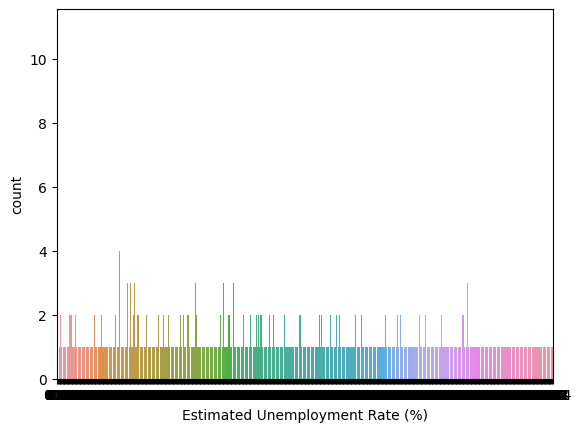

In [27]:
sns.countplot(x="Estimated Unemployment Rate (%)",data=df)
plt.show()

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


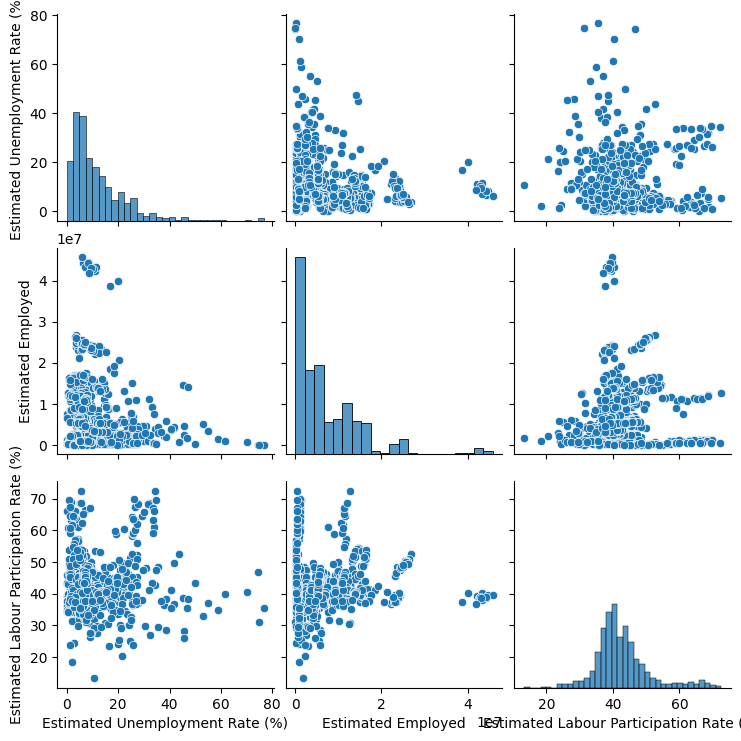

In [28]:
sns.pairplot(df)
plt.show()

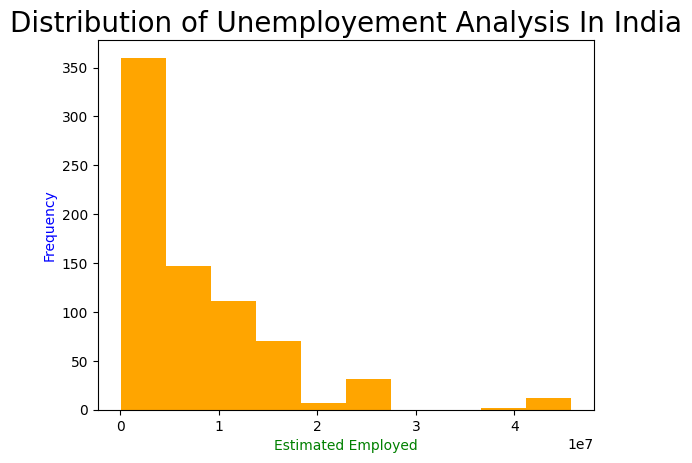

In [32]:
# data visualization
# histogram (numerical)
plt.hist(x=df["Estimated Employed"],color="orange")
plt.title("Distribution of Unemployement Analysis In India",fontsize=20,color="black")
plt.xlabel("Estimated Employed",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="blue")
plt.show()

In [33]:
df["Estimated Employed"].value_counts()

Estimated Employed
11999139.0    1
1183770.0     1
241366.0      1
246596.0      1
227804.0      1
221432.0      1
146957.0      1
134868.0      1
224902.0      1
1130139.0     1
1139815.0     1
1029087.0     1
10083026.0    1
1226793.0     1
1209085.0     1
1079537.0     1
1060116.0     1
998103.0      1
937435.0      1
2404033.0     1
2326911.0     1
2434579.0     1
233029.0      1
232322.0      1
247210.0      1
236315.0      1
6072776.0     1
10574711.0    1
2693596.0     1
2845190.0     1
2405973.0     1
2523005.0     1
2675862.0     1
2821456.0     1
2404239.0     1
2548835.0     1
2630938.0     1
2752834.0     1
2275407.0     1
1606580.0     1
2013083.0     1
2304138.0     1
245668.0      1
237576.0      1
235894.0      1
2335406.0     1
2357627.0     1
2460196.0     1
4605913.0     1
4105211.0     1
4448650.0     1
4640642.0     1
4644510.0     1
4062767.0     1
4440283.0     1
4597507.0     1
4624444.0     1
4079775.0     1
2179106.0     1
2826118.0     1
4601293.0     1
66927

In [34]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [43]:
median1 = df["Estimated Unemployment Rate (%)"].median()
median1

8.35

In [44]:
df["Estimated Unemployment Rate (%)"] = df["Estimated Unemployment Rate (%)"].replace(np.nan,median1)

In [45]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)             0
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [46]:
mean1=df["Estimated Employed"].mean()
mean1

7204460.025675676

In [47]:
df["Estimated Employed"] = df["Estimated Employed"].replace(np.nan,mean1)

In [48]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)             0
Estimated Employed                          0
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [49]:
mode1=df["Estimated Labour Participation Rate (%)"].mode().values[0]
mode1

39.04

In [50]:
df["Estimated Labour Participation Rate (%)"] = df["Estimated Labour Participation Rate (%)"].replace(np.nan,mode1)

In [51]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)             0
Estimated Employed                          0
Estimated Labour Participation Rate (%)     0
Area                                       14
dtype: int64

In [52]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

Hence,their is no missing Values in the dataset!!!!!!!!!!!!!!


THANK YOU .....